$\textbf{Parameters}$

In [1]:
import numpy as np #importing some useful libraries
import matplotlib.pyplot as plt

#Initial conditions can be varied here
L=10
ϵ=.2
κ=.5
T=10
Δx=.1

#Computing useful constants to be used throughout



$\textbf{Heat Equation}$

Our goal is to solve the heat equation $u_t=\kappa u_{xx}$, with boundary conditions $u'(0)=0$ and $\epsilon u(L)+u'(L)=0$. Using standard separation of variable techniques and assuming a solution of the form $u(x,t)=X(x)\cdot T(t)$, we reduce the problem to solving $\frac{T'(t)}{\kappa T(t)}=\frac{X''(x)}{X(x)}=-\lambda^2$.

Solving $\frac{X''(x)}{X(x)}=-\lambda^2$ using the boundary conditions results in an equation in $\lambda$: $\tan{(\lambda L)}-\epsilon/\lambda=0$. We use Newton's Method below in order to find the ground state for $\lambda$.

In [2]:
#Here we compute the eigenvalue from the resulting eigenfunction obtained from solving the PDE by separation of variables
#This is the eigenfunction and its derivative
def EF(x):
    return (np.tan(x*L)-ϵ/x)
def EFPrime(x):
    return L*np.power((1/np.cos(x*L)),2)+ϵ/(x*x)

#Using newton's method for finding λ
def Root(IG):
    for i in range(0,10**5):
        IG=IG-EF(IG)/EFPrime(IG)
    return IG

In [3]:
#We find the ground state root, and determine the exact solution
λ=Root(.108)

S=np.zeros((3,101))
for i in range (0,3):
    for j in range(0,101):
        S[i][j]=np.exp(-λ*κ*i*5)*np.cos(λ*j*Δx)
        
S2=np.zeros((3,1001))
for i in range (0,3):
    for j in range(0,1001):
        S2[i][j]=np.exp(-λ*κ*i*5)*np.cos(λ*j*(Δx/10))

$\textbf{Numerical Approach}$

Below, we implement a solution using finite differences. Discretizing the both the space and time variables, and by using Taylor's theorem, we approximate $u_j^k:=u(x_j,t_k)\approx \alpha (u_{j-1}^{k-1}+u_{j+1}^{k-1})+(1-2\alpha)u_j^{k-1}$, where $\alpha=\kappa \Delta t/2\Delta x$.

We can accomplish this for every time step $k$ by setting $\vec{u}^k=A\vec{u}^{k-1}$, where $A$ is an appropriate tridiagonal matrix.

In [4]:
#Function definition to compute the numerical solution to the heat equation using finite differences.
#It takes parameters L,ϵ,κ,T,Δx,Δt
def HENS(L,ϵ,κ,T,Δx,Δt): 
    N=L/Δx
    M=T/Δt
    α=κ*Δt/(2*(Δx**2))
    U=np.zeros((int(M)+1,int(N)+1))
    for i in range(1,int(N)+1):
        U[0][i]=np.cos(i*Δx*λ)
        #U[0][i]=np.exp()
    U[0][0]=U[0][1]
    U[0][int(N)]=U[0][int(N)-1]/(1+Δx*ϵ)
    
    A=np.zeros((int(N)+1,int(N)+1))
    for i in range(0,int(N)):
        A[i][i]=1-2*α
        A[i+1][i]=α
        A[i][i+1]=α  
    A[int(N)][int(N)]=1-2*α

    for i in range(1,int(M)+1):
        U[i]=np.matmul(A,U[i-1])
        U[i][0]=U[i][1]
        U[i][int(N)]=U[i][int(N)-1]/(1+Δx*ϵ)
        
    return U

    #U=HENS(L,ϵ,κ,T,Δx,Δt)
    #UCN=HENSCN(L,ϵ,κ,T,Δx,Δt)

$\textbf{Crank-Nicolson Time Stepping}$

The function definition below is similar to the one directly above, but with a different tridiagonal matrix that encompasses Crank-Nicolson time stepping.

In [5]:
#Function definition to compute the numerical solution to the heat equation using Crank-Nicolson.
#It takes parameters L,ϵ,κ,T,Δx,Δt

def HENSCN(L,ϵ,κ,T,Δx,Δt):
    N=L/Δx
    M=T/Δt
    α=κ*Δt/(2*(Δx**2))
    U=np.zeros((int(M)+1,int(N)+1))
    for i in range(1,int(N)):
        U[0][i]=np.cos(i*Δx*λ)
        #U[0][i]=np.exp()
    U[0][0]=U[0][1]
    U[0][int(N)]=U[0][int(N)-1]/(1+Δx*ϵ)
    
    A=np.zeros((int(N)+1,int(N)+1))
    for i in range(0,int(N)):
        A[i][i]=1+α
        A[i+1][i]=-α/2
        A[i][i+1]=-α/2  
    A[int(N)][int(N)]=1+α
    
    B=np.zeros((int(N)+1,int(N)+1))
    for i in range(0,int(N)):
        B[i][i]=1-2*α
        B[i+1][i]=α
        B[i][i+1]=α
    B[int(N)][int(N)]=1-α

    C=np.matmul(np.linalg.inv(A),B)
    
    for i in range(1,int(M)+1):
        U[i]=np.matmul(C,U[i-1])
        U[i][0]=U[i][1]
        U[i][int(N)]=U[i][int(N)-1]/(1+Δx*ϵ)
        
    return U

$\textbf{Testing for appropriate $\Delta t$}$

Below, we experiment with different time steps, $\Delta t$. With the initial conditions given, it appears that the largest time step we can take is $\Delta t=.01$, so that $\alpha \le 1/2$. When too large a time step is taken, the approximation grow wildly out of control. To ensure accuracy and minimal error, we will proceed with $\Delta t=10^{-4}$

In [6]:
U1=HENS(L,ϵ,κ,T,Δx,.1)  #Δt=.1.
U2=HENS(L,ϵ,κ,T,Δx,.03) #Δt=.1.
U3=HENS(L,ϵ,κ,T,Δx,.02) #Δt=.1, the largest possible.
print(max(U1[100]-S[2]), max(U2[333]-S[2]), max(U3[500]-S[2])) #Printing the max error at time t=10 for the three choices of #Δt.

1.655787400172027e+88 2.457537607550133e+92 0.3867548800010162


$\textbf{Plotting approximation vs solution}$

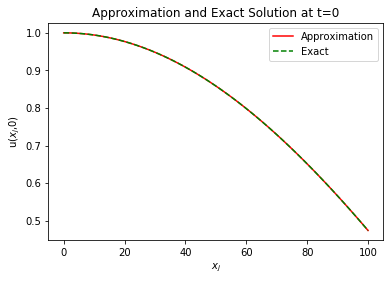

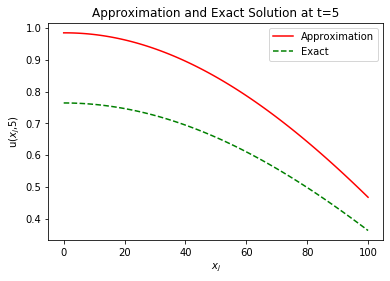

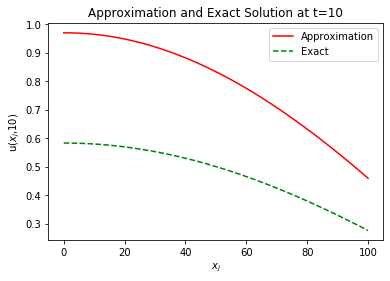

In [7]:
U=HENS(L,ϵ,κ,T,Δx,.0001) 
plt.plot(U[0],'r',label="Approximation")
plt.plot(S[0],'g',label="Exact", linestyle='dashed')
plt.xlabel('$x_j$')
plt.ylabel('u($x_j$,0)')
plt.title('Approximation and Exact Solution at t=0')
plt.legend()
plt.show()

plt.plot(U[50000],'r',label="Approximation")
plt.plot(S[1],'g',label="Exact", linestyle='dashed')
plt.xlabel('$x_j$')
plt.ylabel('u($x_j$,5)')
plt.title('Approximation and Exact Solution at t=5')
plt.legend()
plt.show()

plt.plot(U[100000],'r',label="Approximation")
plt.plot(S[2],'g',label="Exact", linestyle='dashed')
plt.xlabel('$x_j$')
plt.ylabel('u($x_j$,10)')
plt.title('Approximation and Exact Solution at t=10')
plt.legend()
plt.show()


$\textbf{Rate of Convergence}$

Naturally, as we use numerical approximations to a solution, we expect to have error. We can frequently bound this error by knowing its order, and compensating to minimize it. For finite differences, we expect to see a linear rate of convergence in terms of $\Delta t$.

[0.97132302 0.97132302 0.9713219  ... 0.46234019 0.46141972 0.46049873] [0.5836598  0.58365947 0.58365845 ... 0.2778094  0.27725648 0.27670323]


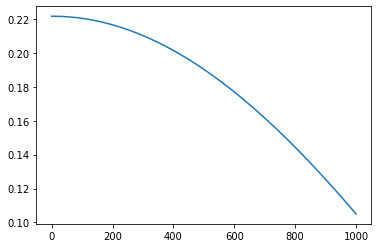

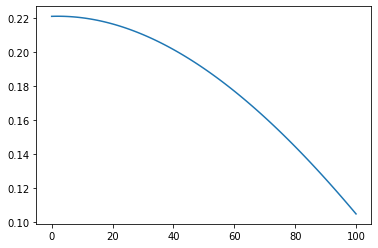

In [8]:
U1=HENS(L,ϵ,κ,T,Δx,.0001) 
E1=max(U1[100000]-S[2])

U2=HENS(L,ϵ,κ,T,Δx/10,.0001) 

print(U2[100000],S2[2])
plt.plot(U2[50000]-S2[1])
plt.show()
plt.plot(U1[50000]-S[1])
plt.show()

0.2853973597485567 0.1788050905341505 0.1929119548890893
[0.99994202 0.99994202 0.99976808 0.9994782  0.99907242 0.99855078
 0.99791334 0.99716018 0.99629139 0.99530706 0.99420731 0.99299227
 0.99166208 0.99021689 0.98865687 0.98698219 0.98519307 0.9832897
 0.9812723  0.9791411  0.97689636 0.97453834 0.9720673  0.96948354
 0.96678735 0.96397905 0.96105897 0.95802743 0.95488479 0.95163143
 0.9482677  0.94479402 0.94121077 0.93751837 0.93371725 0.92980786
 0.92579064 0.92166606 0.9174346  0.91309675 0.90865301 0.9041039
 0.89944995 0.89469169 0.88982968 0.88486449 0.87979667 0.87462684
 0.86935558 0.8639835  0.85851123 0.85293941 0.84726867 0.84149968
 0.83563311 0.82966963 0.82360994 0.81745474 0.81120475 0.80486068
 0.79842328 0.79189329 0.78527147 0.77855858 0.77175541 0.76486274
 0.75788138 0.75081213 0.74365581 0.73641325 0.7290853  0.72167279
 0.7141766  0.70659759 0.69893664 0.69119464 0.68337248 0.67547107
 0.66749134 0.6594342  0.65130059 0.64309145 0.63480773 0.6264504
 0.61802

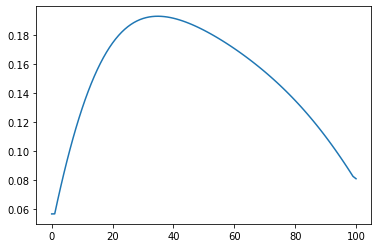

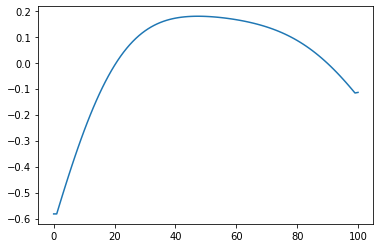

In [9]:
U1=HENSCN(L,ϵ,κ,T,Δx,10)  #Δt=.1.
U2=HENSCN(L,ϵ,κ,T,Δx,.03) #Δt=.1.
U3=HENSCN(L,ϵ,κ,T,Δx,.001) #Δt=.1, the largest possible.
print(max(U1[1]-S[2]), max(U2[161]-S[1]), max(U3[5000]-S[1])) #Printing the max error at time t=10 for the three choices of #Δt.
print(U1[0])

plt.plot(U3[5000]-S[1])
plt.show()
plt.plot(U2[161]-S[1])
plt.show()

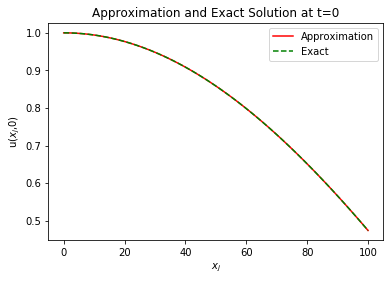

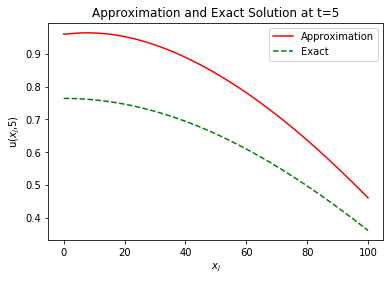

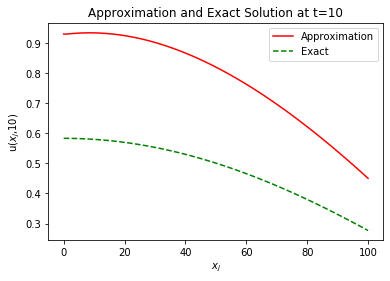

In [10]:
U=HENSCN(L,ϵ,κ,T,Δx,.0001) 
plt.plot(U[0],'r',label="Approximation")
plt.plot(S[0],'g',label="Exact", linestyle='dashed')
plt.xlabel('$x_j$')
plt.ylabel('u($x_j$,0)')
plt.title('Approximation and Exact Solution at t=0')
plt.legend()
plt.show()

plt.plot(U[50000],'r',label="Approximation")
plt.plot(S[1],'g',label="Exact", linestyle='dashed')
plt.xlabel('$x_j$')
plt.ylabel('u($x_j$,5)')
plt.title('Approximation and Exact Solution at t=5')
plt.legend()
plt.show()

plt.plot(U[100000],'r',label="Approximation")
plt.plot(S[2],'g',label="Exact", linestyle='dashed')
plt.xlabel('$x_j$')
plt.ylabel('u($x_j$,10)')
plt.title('Approximation and Exact Solution at t=10')
plt.legend()
plt.show()
